Medvirkende: Hedda Bjørnstad, Julie Marie Ervik og Kristin Fullu

# Dictionary learning for classification problems

## Innledning

Maskinlæring er et felt innenfor kunstig intelligens som går ut på å benytte algoritmer for å finne mønstre i store datasett med en fasit. Maskinen "lærer" av dataen og kan så brukes på andre lignende datasett uten fasit og forutse resultater der. Maskinlæring har i løpet av de siste tiårene blitt mer utbredt og brukes på mange områder, i alt fra bilde- og språkgjenkjenning, epost-filtrering og websøking til selvkjørende biler og tolkning av menneskets genom. (1) (2)

Maskinlæringsteknikken som skal benyttes i dette prosjektet kalles "dictionary learning". Teknikken går ut på at kolonner med informasjon hentes ut fra et treningsdatasett og skaper en basis, også kalt et dictionary. Denne uthentingen skal i prosjektet gjøres på to ulike metoder kalt "Singular Value Decomposition" (SVD) og "Exemplar-based Non-negative Matrix Factorization" (ENMF). SVD går ut på å dekomponere en matrise A slik at $A = U \Sigma V^T$. Dictonariet som dannes er $W = U$. Verdiene i W kan både være positive og negative. ENMF metoden fungerer slik at et valgt antall tilfeldige kolonner hentes ut fra matrise A, og danner dictionariet $W_+$. I motsetning til SVD må alle verdiene her være positive.

Dette prosjektet tar utgangspunkt i et datasett kalt "Modifies National Institute of Standards and Technology database" (MNIST). Datasettet består av 70 000 håndskrevne siffer, hvorav vi har fått utdelt 58 000, 50 000 til trening og 8000 til testing. Disse er fordelt på sifrene 0-9, som vil si at vi har 5000 trenings- og 800 testverdier per siffer. Hvert siffer er lagret i hver sin klasse, som vil si at vi på forhånd vet hvilke siffer alle bildene representerer. Hvert bilde er inndelt i 784 piksler, altså et 28x28 bilde.

I dette prosjektet benyttes SVD og ENMF metodene på MNIST-datasettet, og skal benyttes i blant annet funksjoner for projekson av matriser på basiser og utregning av avstand mellom to matriser, for å til slutt kunne predikere hvilke siffer som befinner seg i hele test-datasettet. Her vil treffsikkerheten til de to metodene studeres og sammenlignes.

Målet med prosjektet er ikke å oppnå en høyest mulig treffsikkerhet, men å lære og forstå hvordan de to metodene fungerer og hvordan de skiller seg fra hverandre. Til slutt skal fordeler og ulemper med de to metodene avveies, og det skal reflekteres over hvordan vi har gått frem med klassifiseringen vi har utført i prosjektet.


#### Importering av bibliotek


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tabulate import tabulate
from matplotlib.ticker import ScalarFormatter
from tqdm import trange

## Oppgave 1

Gjennomgående i oppgave 1 benyttes testmatrisene $A_1$ og $A_2$, og testmatrisen $B$ som er inndelt i kolonnene $b_1$, $b_2$ og $b_3$. Disse matrisene har noen kjente løsninger ved bruk av de ulike metodene. Å kunne teste funksjoner med kjente løsninger gjør det lett å forstå hva de ulike funksjonene gjør og forsikrer at bruken av funksjonene videre i oppgavene stemmer, selv om resultatene blir for kompliserte til å kunne forstås kun ved avlesning av printede verdier. 


### Oppgave 1 a)

I denne oppgaven benyttes SVD til å gjøre en dekomponering av $A_1$ slik at $A_1 = U \Sigma V^T$ ved hjelp av np.linalg.svd. Dictionariet til matrisa befinner seg i $W_1 = U$. Å studere resultatet vil hjelpe med å bestemme hvilken av  basisvektorene i $W_1 = U$ som er viktigst for å rekonstruere $A_1$

In [4]:
A1 = np.array([[1000, 1], [0, 1], [0, 0]])

U1, sigma1, vT1 = np.linalg.svd(A1, full_matrices = False)  # Benytter np.linalg.svd som dekomponerer A til U, Σ og vT
A1rep = np.dot(U1 * sigma1, vT1)                            # Gjenskaper A1 fra U, Σ og vT for å se om dekomponeringen fungerer som forventet

print(f'U: \n {U1} \n ')
print(f'Σ: \n {sigma1} \n ')                                # Ser at Σ returnerer en vektor med diagonalelementene i Σ-matrisen, viktig å vite i videre utregninger
print(f'v\u1D40: \n {vT1} \n ')
print(f'Gjenskapt A\u2081: \n {A1rep} \n ')

U: 
 [[ 1.e+00 -1.e-06]
 [ 1.e-06  1.e+00]
 [ 0.e+00  0.e+00]] 
 
Σ: 
 [1.0000005e+03 9.9999950e-01] 
 
vᵀ: 
 [[ 0.9999995  0.001    ]
 [-0.001      0.9999995]] 
 
Gjenskapt A₁: 
 [[ 1.00000000e+03  1.00000000e+00]
 [-2.16840434e-19  1.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]] 
 


Den viktigste basisvektoren i U for å rekonstruere $A_1$ er vektoren som befinner seg i venstre kolonne. Dette henger sammen med at informasjon går tapt når man regner ut SVD av en matrise. Dekomponeringen fungerer slik at vektoren $\Sigma$ som returneres inneholder verdier fra høyest til lavest, som beskrevet i seksjon 2.1.2 i prosjektbeskrivelsen (1). Dette stemmer overens med printet $\Sigma$ i blokken over. 

$U$ inneholder vektorene (kolonnene) som samsvarer med verdiene i $\Sigma$, fra venstre mot høyre. Dermed vil man ved utføring av "reduced SVD", som fjerner alle nullene i $\Sigma$, først miste kolonner til høyre i $U$, ettersom disse samsvarer med elementene i $\Sigma$ som eventuelt inneholder en null. Når man så utfører "truncated SVD", fjernes verdiene i $\Sigma$ som man selv anser som for lave. Disse samsvarer også med vektorer til høyre i $U$, og man ser derfor at de vektorene som bidrar mest til å rekonstruere $A_1$ er de som befinner seg lengst til venstre i $U$.

Ved å se på den gjenskapte $A_1$ matrisa, bekrefter vi også at $A_1$ = $U \Sigma V^T$. Verdi $a_{21}$ er tilnærmet lik null, men ikke helt lik på grunn av regnefeil i Python. Slike avrundingsfeil kommer til å dukke opp gjennom prosjektet.

### Oppgave 1 b)

I denne oppgaven skal det vises at det i noen tilfeller er mulig å fullt rekonstruere den opprinnelige matrisa, selv om man har benyttet "truncated SVD". Oppgaven er delt i to, før reduksjon og etter reduksjon. Dersom resultatene fra hver av delene blir like, har ikke noe informasjon gått tapt under trunkeringen.

In [5]:
A2 = np.array([[1,0,0], [1,0,0], [0,0,1]])

In [6]:
# Før reduksjon
U2, sigma2, vT2 = np.linalg.svd(A2, full_matrices = False)
A2rep = np.dot(U2 * sigma2, vT2) 

print(f'U: \n {U2} \n ')
print(f'Σ: \n {sigma2} \n ')
print(f'v\u1D40: \n {vT2} \n ')
print(f'Gjenskapt A\u2082: \n {A2rep} \n ')

U: 
 [[-0.70710678  0.         -0.70710678]
 [-0.70710678  0.          0.70710678]
 [ 0.          1.          0.        ]] 
 
Σ: 
 [1.41421356 1.         0.        ] 
 
vᵀ: 
 [[-1. -0. -0.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]] 
 
Gjenskapt A₂: 
 [[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]] 
 


Vi observerer at element 3 i $\Sigma$ = 0. Som forklart i oppgave 1 a) er det da mulig å fastslå at vektor 3 i $U$ ikke inneholder nyttig informasjon for å gjenskape $A_2$. Dette kan også sees ved å se direkte på $U$, hvor vektor 1 og 3 er identiske.

Dette tilsier at vektorene i $A_2$ er lineært avhengige av hverandre, fordi man kan oppnå $k_1a_1 + k_2a_2 + k_3a_3 = 0$ selv om ikke de vilkårlige konstantene $k_1 = k_2 = k_3 = 0$.

Vi vet derfor at dersom vi benytter "reduced SVD" og kun fjerner vektor 3, vil ingen nyttig informasjon om $A_2$ gå tapt, og vi kan trygt rekonstruere den fullstendig. Vi velger derfor å fjerne tredje kolonne i U.

In [7]:
# Etter manuell reduksjon
U2Red = np.delete(U2, obj=2, axis=1)              # Fjerner objektet i matrise U2 med indeks 2 og akse 1, altså tredje kolonne
sigma2Red = sigma2[0:2]                           # Fjerner tredje verdi i Σ-vektoren
vT2Red = np.delete(vT2, obj=2, axis=0)            # Fjerner objektet i matrise vT2 med indeks 2 og akse 0, altså tredje rad
A2MatriseRed = np.dot(U2Red * sigma2Red, vT2Red)  # Gjenskaper A2 med de reduserte U, Σ og vT

print(f'U etter reduksjon: \n {U2Red} \n ')
print(f'Σ etter reduksjon: \n {sigma2Red} \n ')
print(f'v\u1D40 etter reduksjon: \n {vT2Red} \n ')
print(f'Gjenskapt A\u2082: \n {A2MatriseRed} \n ') # Ser at A2 blir den samme etter reduksjon

U etter reduksjon: 
 [[-0.70710678  0.        ]
 [-0.70710678  0.        ]
 [ 0.          1.        ]] 
 
Σ etter reduksjon: 
 [1.41421356 1.        ] 
 
vᵀ etter reduksjon: 
 [[-1. -0. -0.]
 [ 0.  0.  1.]] 
 
Gjenskapt A₂: 
 [[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]] 
 


Vi observerer her at den gjenskapte $A_2$ er identisk den som ble gjenskapt før reduksjonen, samt den originale $A_2$. Vi kan derfor fastslå at man trygt kan gjenskape $A_2$ etter trunkering, dersom vi velger en grei $d < 3$. I denne reduksjonen valgte vi $d=2$, men hadde vi valgt $d=1$ hadde vi ikke kunne gjenskapt $A_2$ fordi informasjon om matrisa hadde gått tapt.


Som nevnt i oppgavebeskrivelsen er det lurt å ha en egen funksjon for å trunkere SVD, ettersom dette skal gjøres mange ganger gjennom prosjektet.

In [8]:
def truncSVD(U, Σ, VT, d):                          
    '''
    Input: Matrisene U, Σ, VT, antall kolonner d av dictionariet som skal være med
    Output: Dictionary W = Ud, H = Σd*VdT
    '''
    
    Σ = Σ[:d]                  # Tar med de d første verdiene
    VT = VT[:d, :]             # Tar med de d første radene, alle kolonnene

    W = U[:, :d]               # Tar med de d første kolonnene, alle radene
    
    H = np.multiply(Σ, VT.T).T # Ganger Σ sammen med VT.T for at dimensjoner skal gå opp, transponerer denne igjen for riktig dimensjon ut
    # Utregningen av H må gjøres på denne måten fordi Σ som nevnt ikke er en nxn matrise med verdier langs diagonalen, men en vektor med diagonalverdiene 

    return W, H

For å være sikre på at trunkeringen er implementert rett i truncSVD, testes funksjonen med de samme verdiene som tidligere i oppgave 1 b), som har et kjent resultat.

In [9]:
# Tester med A2
W2, H2 = truncSVD(U2, sigma2, vT2, 2)

print(f'Gjenskapt A\u2082: \n {np.dot(W2, H2)} \n ') # Ser at A2 blir lik

Gjenskapt A₂: 
 [[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]] 
 


Ettersom den gjenskapte $A_2$ blir lik, konkluderer vi med at truncSVD er implementert riktig.

Kommentar: Vi vil presisere at vi tolket oppgaven som at vi først skulle redusere $A_2$ manuelt før vi så lagde truncSVD, som er grunnen til at vi tester denne igjen etterpå for å være sikre på at den gjør det vi ønsker.

### Oppgave 1 c)

Å finne projeksjonen til kolonnene av en matrise ned på en dictionary er nyttig for å finne den minste avstanden til en dictionary. Dette er igjen nyttig for f.eks. å finne hvilket dictionary den gitte matrisen ligger nærmest, som gjøres i blant annet oppgave 2 og 3, hvor dictionaries brukes for å gjenkjenne siffere. 

I denne deloppgaven finner vi en projeksjon som kan regnes ut vha. en ortogonal basis, som er funnet gjennom SVD-dekomponering.

In [10]:
def orthproj(W, matrix):
    '''
    Input: Dictionary W og matrisen som skal projiseres
    Output: Projeksjonen PW av matrisen på W
    '''
    hMarked = np.dot(W.T, matrix)           # Regner ut prikkproduktet mellom transponert W og matrisen
    PW = np.dot(W, hMarked)                 # Regner ut projeksjonen, prikkproduktet mellom W og h merket
    
    return PW

def dist(W, matrix):
    '''
    Input: Dictionary W og en matrise
    Output: Avstanden D mellom matrisen og dens projeksjon på W
    '''
    PD = orthproj(W, matrix)                # Projiserer matrisen ned på W
    D = np.linalg.norm(matrix - PD, axis=0) # Finner avstanden mellom matrisen og dens projeksjon på W

    return D

In [11]:
B = np.array([[2,0,0], [1,0,1], [0,1,0]])

# Testing a)
P1 = orthproj(U1, B)
D1 = dist(U1,B)

# Testing b)
P2 = orthproj(W2, B)
D2 = dist(W2,B)

print(f'Projeksjon av B på W\u2081: \n {P1} \n ')
print(f'Projeksjon av B på W\u2082: \n {P2} \n ')

print(f'Avstand fra B til W\u2081: \n {D1} \n ')
print(f'Avstand fra B til W\u2082: \n {D2} \n ')

Projeksjon av B på W₁: 
 [[2. 0. 0.]
 [1. 0. 1.]
 [0. 0. 0.]] 
 
Projeksjon av B på W₂: 
 [[1.5 0.  0.5]
 [1.5 0.  0.5]
 [0.  1.  0. ]] 
 
Avstand fra B til W₁: 
 [0.00000000e+00 1.00000000e+00 1.11022302e-16] 
 
Avstand fra B til W₂: 
 [0.70710678 0.         0.70710678] 
 


Vi observerer at det er vanskelig å tolke informasjonen i projeksjonene, men får en god forståelse av hva avstanden representerer. Vi observerer også at $D_{W_1}(B) \approx [0\quad1\quad0]$ som forventet, og fastslår dermed at både orthproj og dist er implementert riktig.

### Oppgave 1 d)

Vi har også lyst til å kunne regne ut projeksjonen vha. ENMF-metoden. Det kan noen ganger være en fordel å ta i bruk ENMF over SVD, blant annet fordi bilder inneholder verdier som er ikke-negative. Derfor trengs en ny projeksjonsfunksjon som benytter en ikke-negativ basis istedet for en ortogonal. Vi ønsker egentlig å benytte minste kvadraters metode for å regne ut $H^*$, slik at vi kan sette $P^{+}_{W_+}(A) = W_+H^*$. Uttrykket vi får gir derimot ikke noe enkelt svar, og $H^*$ må finnes vha. en iterativ numerisk metode.

In [12]:
def nnproj(WPlus, matrix, maxIter, delta):
    '''
    Input: "Non-negative" Dictionary WPlus, matrisen som skal projiseres, antall iterasjoner for hk og en valgt delta
    Output: Projeksjonen PW av matrisen på W
    '''
    (m,n) = matrix.shape                   # Finner n antall kolonner i matrisen
    (m,d) = WPlus.shape                    # Finner d antall kolonner i WPlus
    
    hkplus1 = np.random.uniform(0,1,(d,n)) # Lager dxn matrise med tilfeldige tall mellom 0 og 1
    
    WTA = np.dot(WPlus.T,matrix)           # Finner prikkproduktet mellom transponert WPlus og matrisen
    WTW = np.dot(WPlus.T,WPlus)            # Finner prikkproduktet mellom transponert WPlus og WPlus
    
    for i in range(maxIter):               # Regner ut hk iterativt, med maxIter iterasjoner
        hk = hkplus1
        first = np.multiply(hk,WTA)        # Regner ut første ledd, elementvis multiplikasjon av hk og WTA
        second = np.dot(WTW,hk) + delta    # Regner ut andre ledd, prikkproduktet mellom WTW og hk + delta (benyttes for å unngå å dele på 0)
        hkplus1 = np.divide(first,second)  # Elementvis divisjon av første og andre ledd
   
    PW = np.dot(WPlus, hkplus1)            # Prikkproduktet av WPlus og endelig verdi av hk
    return PW, hkplus1
    
    
def nndist(W, matrix, maxIter, delta):
    '''
    Input: Dictionary W, en matrise, antall iterasjoner for hk og en valgt delta
    Output: Avstanden D mellom matrisen og dens projeksjon på W
    '''
    PD = nnproj(W, matrix, maxIter, delta)[0]
    D = np.linalg.norm(matrix - PD, axis=0)

    return D

# Setter delta og maxIter som i oppgaveteksten
delta = 10**(-10)
maxIter = 50

PA1B, hA1B = nnproj(A1, B, maxIter, delta)
PA2B, hA2B = nnproj(A2, B, maxIter, delta)
DBA1 = nndist(A1, B, maxIter, delta)
DBA2 = nndist(A2, B, maxIter, delta)

print(f'Projeksjonen av B på A1: \n {PA1B} \n ')
print(f'Vekten h\u2096 av B på A1: \n {hA1B} \n ')
print(f'Projeksjonen av B på A2: \n {PA2B} \n ')
print(f'Vekten h\u2096 av B på A1: \n {hA2B} \n ')
print(f'Avstanden fra B til A1: \n {DBA1} \n ')
print(f'Avstanden fra B til A2: \n {DBA2} \n ')



Projeksjonen av B på A1: 
 [[2.00041253 0.         0.5       ]
 [0.99917391 0.         0.5       ]
 [0.         0.         0.        ]] 
 
Vekten hₖ av B på A1: 
 [[0.00100124 0.         0.        ]
 [0.99917391 0.         0.5       ]] 
 
Projeksjonen av B på A2: 
 [[1.5 0.  0.5]
 [1.5 0.  0.5]
 [0.  1.  0. ]] 
 
Vekten hₖ av B på A1: 
 [[1.5 0.  0.5]
 [0.  0.  0. ]
 [0.  1.  0. ]] 
 
Avstanden fra B til A1: 
 [0.00156045 1.         0.70710678] 
 
Avstanden fra B til A2: 
 [7.07106781e-01 1.00000008e-10 7.07106781e-01] 
 


Her er $\delta$ en verdi som sørger for at det andre leddet i den ikke-negaitve projeksjonen aldri blir null, slik at vi unngår feilmeldinger som "zero division". Den kalles "sparsity" eller "glissenhetskonstant" på norsk. 

Det kan bekreftes at algoritmen fungerer ved å blant annet å sammenligne $P^+_{A_2}(B)$ og $P_{W_2}(B)$ fra forrige deloppgave. Vi observerer at disse blir identiske, og antar derfor at algoritmen er implementert riktig.

$D_{A_1}(B)\approx [0\quad1\quad1/\sqrt{2}]$ også i dette tilfellet, men med en noe større numerisk feil enn i SVD-metoden. Dette gir mening ettersom maxIter = 50 gir relativt få utregninger av $h_k$. Dersom maxIter hadde vært større ville verdiene kommet nærmere $[0\quad1\quad1/\sqrt{2}]$. Til gjengjeld ville også krevd lengre kjøretid. 

# Oppgave 2

Gjennom oppgave 2 skal vi bli kjent med MNIST datasettet. Å bruke ekte data på denne måten gjør at det er enklere å se effekten av projeksjoner og dictonaries i motsetning til i oppgave 1. Vi skal implementere og teste hjelpefunksjoner som vil gi oss større forståelse for selve trenings- og testingsprosessen, slik at vi trygt kan bruke dette til selve klassifiseringen i oppgave 3.

### Oppgave 2 a)

Vi laster først inn MNIST-datasettet, både "train" og "test", til bruk i oppgave 2 og 3. I tillegg plottes de første 16 tallene fra datasettet "train" for å se at det faktisk er forskjellige tall i datasettet.

In [13]:
train = np.load('train.npy')/255.0  # Laster inn treningsdatasettet og omskalerer det, slik at pikselverdiene skal ligge mellom 0 og 1
test = np.load('test.npy')/255.0    # Laster inn testdatasettet og omskalerer det, slik at pikselverdiene skal ligge mellom 0 og 1

# Sjekker at formen på train og test er slik vi forventer
# Formen representerer antall piksler per bilde, antall bildeklasser og antall bilder per klasse

print(train.shape) # Skal være (784,10,5000)
print(test.shape)  # Skal være (784,10,800)

(784, 10, 5000)
(784, 10, 800)


In [14]:
# Denne er utdelt kode, og er ikke endret
def plotimgs(imgs, nplot = 4):
    """
    Plots the nplot*nplot first images in imgs on an nplot x nplot grid. 
    Assumes heigth = width, and that the images are stored columnwise
    input:
        imgs: (height*width,N) array containing images, where N > nplot**2
        nplot: integer, nplot**2 images will be plotted
    """

    n = imgs.shape[1]
    m = int(np.sqrt(imgs.shape[0]))

    assert(n > nplot**2), "Need amount of data in matrix N > nplot**2"

    # Initialize subplots
    fig, axes = plt.subplots(nplot, nplot)

    # Set background color
    plt.gcf().set_facecolor("lightgray")

    # Iterate over images
    for idx in range(nplot**2):

        # Break if we go out of bounds of the array
        if idx >= n:
            break

        # Indices
        i = idx//nplot; j = idx%nplot

        # Remove axis
        axes[i,j].axis('off')

        axes[i,j].imshow(imgs[:,idx].reshape((m,m)), cmap = "gray")
    
    # Plot

    fig.tight_layout()
    plt.show()


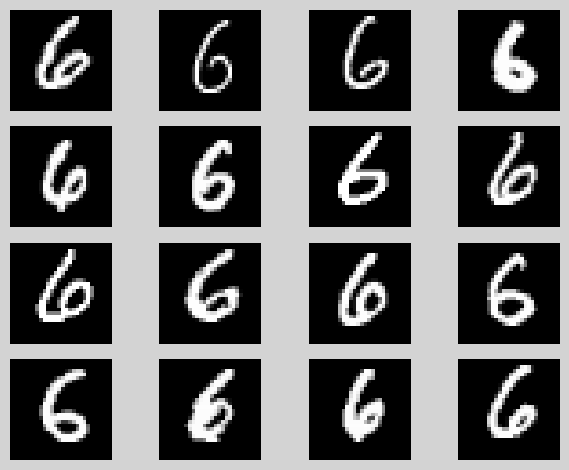

In [15]:
# Plotter de første 16 bildene av tallet 6
plotimgs(train[:,6,:], nplot = 4)

De 16 første bildene gir oss innsikt i hvor ulike de forskjellige bildene av 6-tall faktisk er. At det er såpass forskjell på mange av dem er viktig å huske på når i videre med oppgaven.

### Oppgave 2 b)

I denne oppgaven skal vi se på de 16 første basisvektorene i dictionariet $U_d$. Ved å observere basisvektorene  sammen med singulærverdiene, kan vi få informasjon om hvor viktige basisvektorene er for å kunne gjenskape et datasett.

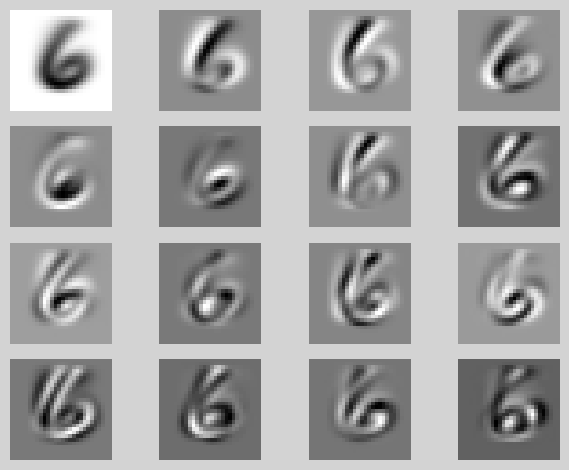

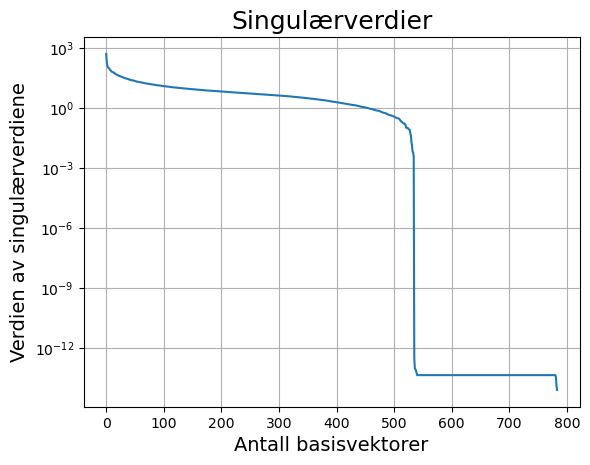

In [16]:
USix, sigmaSix, vTSix = np.linalg.svd(train[:,6,:], full_matrices = False) # Regner ut SVD til tallet 6, med alle 5000 bildene

plotimgs(USix, nplot = 4) # Plotter de 16 første kolonnevektorene i U_d

plt.semilogy(sigmaSix)    # Plotter singulærverdiene med logaritmisk y-aksen. Fra oppgavebeskrivelsen vet vi at de er lagret fra høyeste til laveste i Σ
plt.title("Singulærverdier", size = 18)
plt.ylabel("Verdien av singulærverdiene", size = 14)
plt.xlabel("Antall basisvektorer", size = 14)
plt.grid()
plt.show()

Hvert bilde av 6-tall har en unik karakteristikk. Gradienten til disse tallene er representert som singulære vektorer i $U_d$, og plottet av $U_d$ i dette tilfellet viser de 16 første singulære vektorene fra venstre av matrisen. Hver vektor inneholder altså unik informajon om datasettet, og hvor viktige disse er avhenger av de tilhørende singulærverdiene. Ser man de 16 bildene i sammenheng med plottet under, ser man at det er de første verdiene som viser de viktigste trekkene til bildet.

Vi observerer at singulærverdiene til venstre i plottet, med verdi mellom rundt $1$ og $10^{3}$, alle synes å bidra med viktig informasjon for rekonstruksjon. Singulærverdiene er lagret fra størst til minst, så etter hvert faller grafen brått ned til tilnærmet null i verdi for resten av basisvektorene. Dette henger sammen med rangen av $U_d$, som gir antallet basisvektorer som er lineært uavhengige av hverandre. Dette vil si at der singulærverdiene er null, er basisvektorene lineært avhengige, og bidrar ikke med noen ny informasjon til rekonstruksjon.

Plottet for singulærverdiene er brattest helt i starten, som viser at vektorene med akkurat disse verdiene vil være de viktigste for å beskrive bildet vårt. Dette kan man se i plottet av de 16 basisvektorene over, hvor det første bildet øverst til venstre skiller seg mest fra de andre. Det er det klareste bildet og det som ligner mest på et 6-tall - tallet dictionaryen er trent opp til å beskrive. Vi vet at dictionaries konstruert ved bruk av SVD skal kunne gjenskape et datasett bra med kun få basisvektorer, som vil si at få vektorer inneholder mye informasjon om et datasett. Derfor stemmer det bra at de første basisvektorene til $U_d$ inneholder mye informasjon om 6-tall. 

### Oppgave 2 c)

I denne oppgaven skal det undersøkes hvor bra et dictionary kan gjenskape ett bilde av et bestemt tall. I det første del skal et dictionary trent på tallet 6, sjekke hvor bra det kan representere ett bilde av samme tall for ulike antall basisvektorer d. I andre del skal det samme dictionariet forsøke å representere ett bilde av et 2 tall med ulike antall d. 

Vi undersøker disse situasjonene for å se hvordan et dictionary trent på et tall gjenskaper et tall av samme type kontra andre typer tall. Dette er informasjon vi trenger når vi skal undersøke og klassifisere større datasett i oppgave 3. 

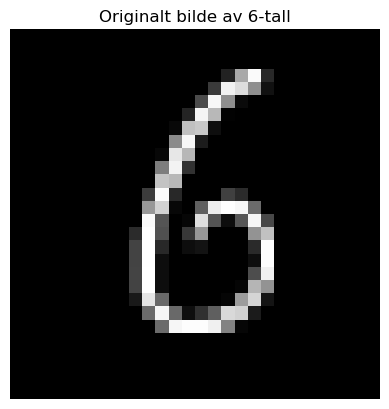

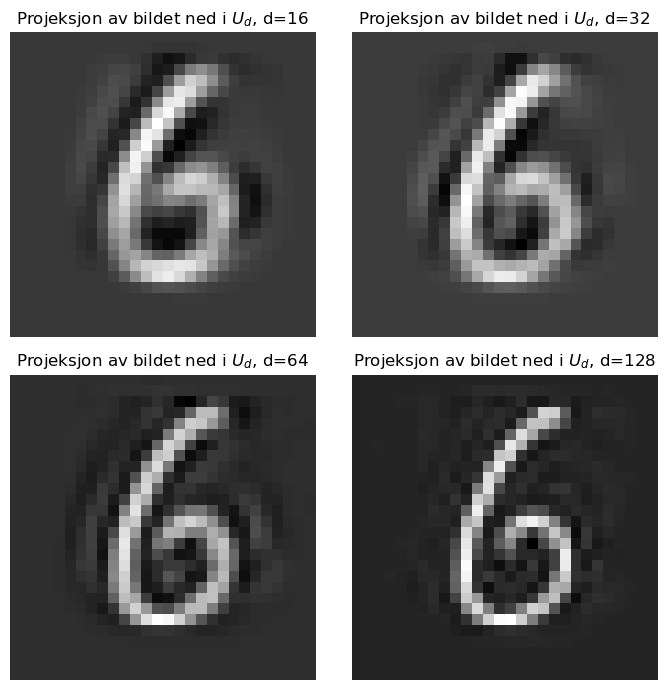

In [17]:
d = [16, 32, 64, 128]                     # Ønskede verdier for d, antall kolonner
label = ["d=16", "d=32", "d=64", "d=128"]


''' Plotter det første 6-tallet i traindatasettet '''
plt.imshow(train[:,6,1].reshape((28,28)), cmap='gray') # Bildene er lagret i kolonner, så de reshapes til 28x28 for å danne et bilde
plt.title("Originalt bilde av 6-tall")
plt.axis('off')
plt.show()


''' Regner ut og plotter projeksjonen av tallet 6 på basiser med ulik d '''
fig, ax = plt.subplots(2, 2, figsize=(7, 7))
ax = ax.ravel()
for i in range(0, len(d)):
    Ud, Hd = truncSVD(USix, sigmaSix, vTSix, d[i])
    PWb = orthproj(Ud, train[:,6,:])
    ax[i].imshow(PWb[:,1].reshape((28,28)), cmap='gray') 
    ax[i].set_title(f'Projeksjon av bildet ned i $U_d$, {label[i]}')
    ax[i].axis('off')
fig.tight_layout()

plt.show()

Når d øker, kan man se at bildene blir tydeligere, skarpere og mer detaljerte. Dette forklares med at når d er lav mister dictionarien informasjon om bildet, som man kan se i det første bildet, og når d er større kan datamaskinen bli tregere, men bildet blir mer tydelig og detaljert. Selv om d er lav i starten ser vi uansett at den viktigste informasjonen, altså at det faktisk ser ut som et 6 tall, er med. I det siste bildet er dette helt tydelig, men det observeres at det fortsatt er litt støy rundt bildet. Altså kunne tallet blitt enda bedre representert hvis d var enda høyere enn 128.

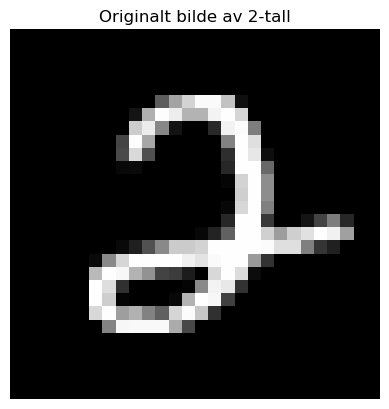

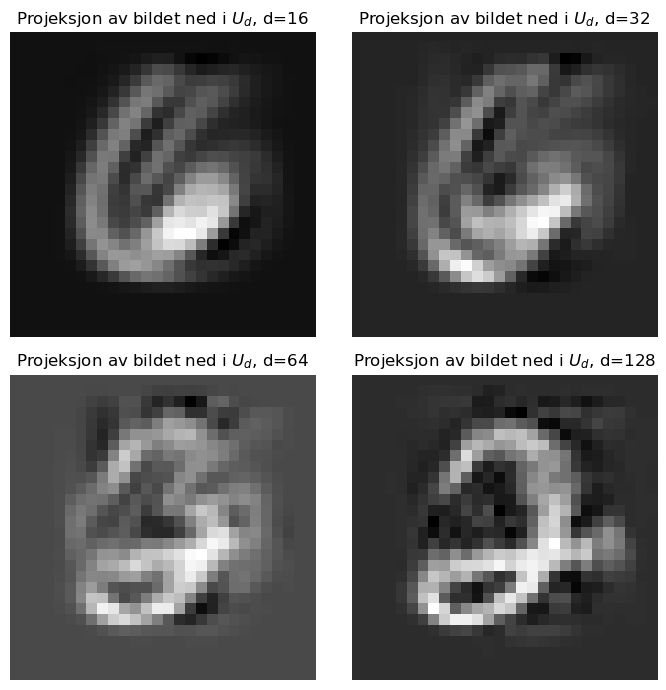

In [18]:
d = [16, 32, 64, 128]                     # Ønskede verdier for d, antall kolonner
label = ["d=16", "d=32", "d=64", "d=128"]

''' Plotter det første 2-tallet i traindatasettet '''
plt.imshow(train[:,2,1].reshape((28,28)), cmap='gray') # Reshapes som 6-tallet
plt.title("Originalt bilde av 2-tall")
plt.axis('off')
plt.show()


''' Regner ut og plotter projeksjonen av tallet 2 på basiser med ulik d som er trent på 6-tall '''
fig, ax = plt.subplots(2, 2, figsize=(7, 7))
ax = ax.ravel()
for i in range(0, len(d)):
    UdSix, HdSix = truncSVD(USix, sigmaSix, vTSix, d[i])
    PWbTihlde = orthproj(UdSix, train[:,2,:])
    ax[i].imshow(PWbTihlde[:,1].reshape((28,28)), cmap='gray') 
    ax[i].set_title(f'Projeksjon av bildet ned i $U_d$, {label[i]}')
    ax[i].axis('off')
fig.tight_layout()
plt.show()

I dette plottet kommer det frem at siden $U_d$ er lært opp til å gjenskape tallet 6, kreves en stor d for å kunne gjenskape tallet 2. Sammenlignet med plottet over, hvor det er klart at de første bildene viser et 6 tall, ser man ikke at bildene skal representere et 2 tall før i det siste. Dette bildet inneholder mer informasjon om 2 tallet, da d er mye større. Når d er større kan dictionarien lettere representere andre tall enn det den er lært opp til. Jo flere basisvektorer dictionarien har, desto lettere er det å gjenskape et tall, da vi får mer informasjon som kan tilfredsstille kravene til andre tall enn tallet 6. Om dictionarien hadde hatt alle basisvektorene, ville den kunne gjenskape alle tall i datasettet 100%. Vi ser altså at ved $d=128$ har dictionaryen nok informasjon til å kunne representere tallet 2 også. Likevel observeres det mye støy rundt tallet, mer enn rundt det tilsvarende 6-tallet i forrige plott.

Denne sammenligningen viser at en dictionary for tallet 6 med en lav d ikke er gunstig for å representere et 2 tall, men at med en økende d kan 6-talls-dictionarien representere 2 tallet bedre. Vi kan derfor konkludere med at i et datasett med ulike tall, vil et 6-talls-dictionary med en lav verdi for d klare å gjenskape 6-tallene best. Dersom antall d øker, vil derimot treffsikkerheten til datamaskinen synke er. Derfor funker SVD bedre for lave verdier for d. Dette er viktig informasjon som tas med til senere oppgaver, blant annet oppgave 3 f).

### Oppgave 2 d)

For at programmet skal oppå best resultat er det viktig å ha en god verdi for d. En for stor d vil gjøre programmet tregt og kan føre til feil, men ved en for lav d vil viktig informasjon gå tapt. I denne oppgaven plottes avstanden mellom alle 6-tall og deres projeksjon ned i SVD dictonarien som en funksjon av d for å se hva som er en hensiktsmessig verdi for d.

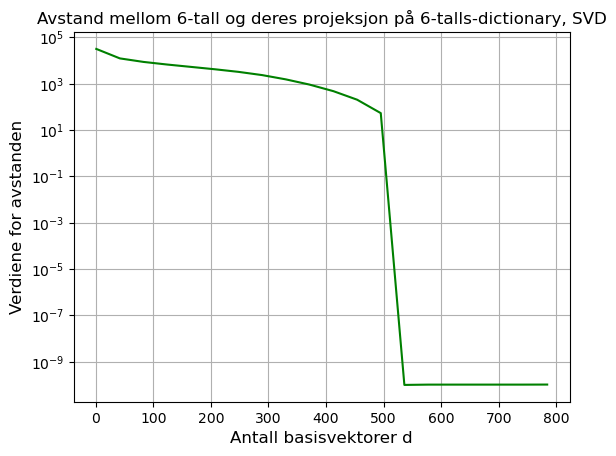

In [19]:
dGrid = np.linspace(1, 784, 20, dtype=int)  # Lager et grid med antall basisvektorer vi ønsker i dictionaryen
dValues = np.zeros(dGrid.size)              # Lager et tomt array med samme størrelse som dGrid for å lagre de tilsvarende verdiene for avstanden

for i in range(len(dGrid)):
    UdIncSix, HdIncSix = truncSVD(USix, sigmaSix, vTSix, dGrid[i])
    DistAtoUdIncSix = dist(UdIncSix, train[:,6,:])
    dValues[i] = np.sum(DistAtoUdIncSix)    # Finner summen av alle avstandene
    
plt.semilogy(dGrid, dValues , c= 'green')
plt.title("Avstand mellom 6-tall og deres projeksjon på 6-talls-dictionary, SVD")
plt.xlabel("Antall basisvektorer d", fontsize=12)
plt.ylabel("Verdiene for avstanden", fontsize=12)
plt.grid()
plt.show()

Plottet viser at for $d < 500$ er avstanden mellom 6-tallene og deres tilhørende projektsjon relativt stor, mens for $d > 500$ er avstanden tilnærmet null. Altså ser man at jo større d er, desto mindre blir avstanden, og jo bedre representerer dictionaryen tallet. Likevel er det viktig å vite at selv om avstanden er stor, betyr ikke det at gjenskapelsen av bildet blir dårlig. Dette ser vi blant annet i forrige oppgave, hvor projeksjonen av 6-tallet med kun $d = 16$ allerede ser ut som et 6 tall.

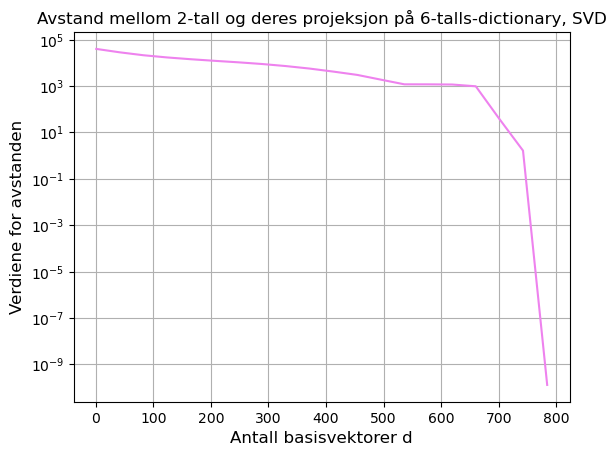

In [20]:
dGrid = np.linspace(1, 784, 20, dtype=int) # antall basisvektorer i dictionaryen
dValues = np.zeros(dGrid.size) # lager en tom array med størrelsen til d_grid

for i in range(len(dGrid)):
    UdIncSix, HdIncSix = truncSVD(USix, sigmaSix, vTSix, dGrid[i])
    DistAtoUdIncSix2 = dist(UdIncSix, train[:,2,:])
    dValues[i] = np.sum(DistAtoUdIncSix2) # legger til distanseverdier i arrayen 
    
# Plotter dinstansen til projeksjonen på bildet
plt.semilogy(dGrid, dValues, c= 'violet')
plt.title("Avstand mellom 2-tall og deres projeksjon på 6-talls-dictionary, SVD")
plt.xlabel("Antall basisvektorer d", fontsize=12)
plt.ylabel("Verdiene for avstanden", fontsize=12)
plt.grid()
plt.show()

I dette plottet observeres det at avstanden fra 2-tallet til 6-talls-dictionarien holder seg høy selv ved større d. Dette gir mening når man sammenligner med bildene som er plottet i 2c), der man ser at tallet 2 blir dårlig representert av dictionarien. Som nevnt vil dette også bety at når man når maks antall basisvektorer, altså $d = 784$ (ettersom dette er antall piksler i bildene), vil 2-tallet kunne representeres bra, og avstanden faller til tilnærmet null, som vist i høyre del av grafen.

En viktig observasjon er at selv om avstanden mellom 6-tall og 6-talls-dictionary er høy, er den høyere mellom 2-tall og 6-talls-dictionary. Dette er en viktig egenskap vi kommer til å benytte i oppgave 3 når nye bilder skal klassifiseres med bakgrunn i avstand mellom bilde og projeksjonen i ulike basiser. 

### Oppgave 2 e)

I denne oppgaven skal vi implementere kode som oppretter $W_+$, og undersøke projeksjonene $P^+_{W_+}(A)$. Vi skal deretter sammenligne SVD og ENMF. Som tidligere nevnt kan det til tider være en fordel å benytte seg av ENMF over SVD på grunn av at bilder ikke inneholder negative verdier. Vi vil her derfor se på om ENMF gir oss god nok informasjon til å kunne konkurrere med SVD på andre punkt enn dette.

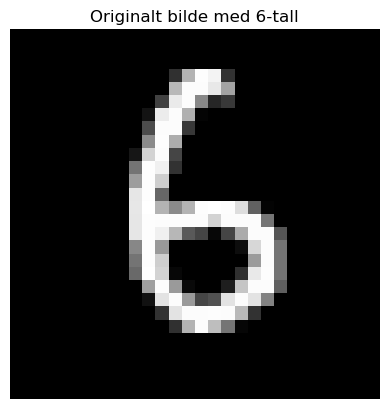

Projeksjoner for ENMF


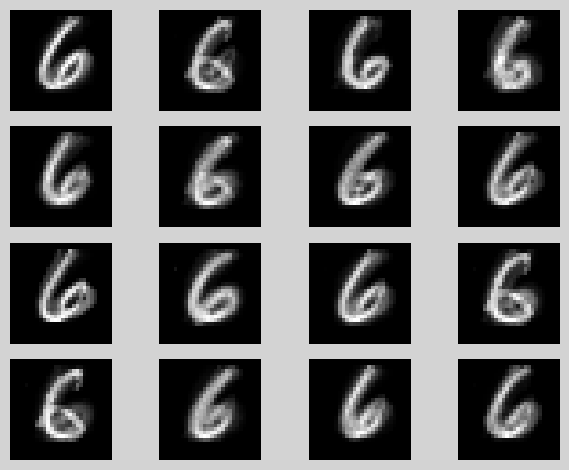

Projeksjoner for SVD


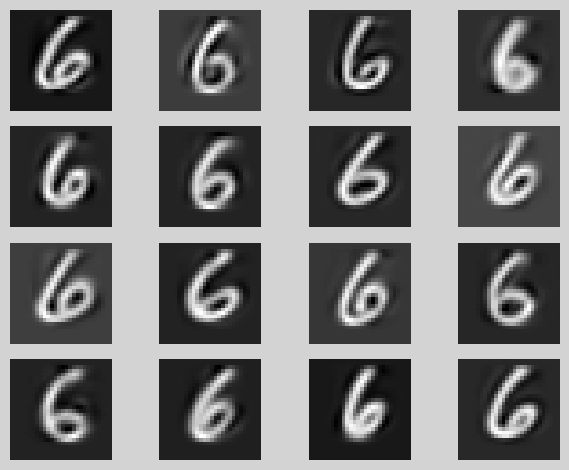

In [21]:
maxIter = 50
delta = 10^(-10)

# Trekker ut 32 tilfeldige kolonner fra A
indexSelection = np.random.choice(train[:,6,:].shape[1],32,replace=False)
WPlus = train[:,6,:][:,indexSelection]

# Plotter det første 6 tallet i testdatasettet
plt.imshow(test[:,6,1].reshape((28,28)), cmap='gray')
plt.title("Originalt bilde med 6-tall")
plt.axis('off')
plt.show()

# Plotter projeksjonen av 16 bilder av 6-tall med ENMF
projofAtoWPlus, hAtoWPlus = nnproj(WPlus, train[:,6,:], maxIter, delta)
print("Projeksjoner for ENMF")
plotimgs(projofAtoWPlus, nplot = 4)

# Plotter projeksjonen av 16 bilder av 6-tall med SVD
U32, sigma32, vT32 = np.linalg.svd(train[:,6,:], full_matrices = False)
W32, H32 = truncSVD(U32, sigma32, vT32, 32)
projofAtoW32 = orthproj(W32, train[:,6,:])
print("Projeksjoner for SVD")
plotimgs(projofAtoW32, nplot = 4)
    
plt.show()

Vi observerer at SVD metoden generelt beskriver de 16 første bildene bedre enn ENMF. I ENMF vil noen av tallene bli noe uklare, og har mer støy rundt tallene enn SVD. Vi ser også at bakrunnen til bildene i ENMF er helt svarte, slik at kontrasten mellom bakgrunnen og tallet blir mye tydeligere. Grunnen til dette er fordi ENMF ikke tillater negative verdier, så de fleste pikslene i bakgrunnen vil ha verdi 0. I SVD ser vi derimot at bakgrunnen blir lysere, noe som skjer fordi den tillater negative verdier og er nødt til å "spare" farge for å kunne representere eventuelle negative verdier.

### Oppgave 2 f)

Akkurat som i oppgve 2d) er det viktig å finne en god verdi for d i ENMF-metoden. Derfor gjentas oppgave 2d) for ENMF her, altså plottes avstanden mellom alle 6-tall og deres projeksjon ned i ENMF dictonarien som en funksjon av d for å se hva som er en hensiktsmessig verdi for d.

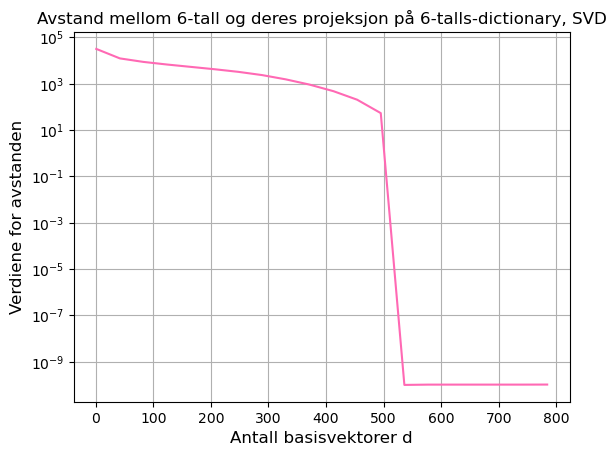

In [22]:
dGrid = np.linspace(1, 784, 20, dtype=int)
dValues = np.zeros(dGrid.size)

for i in range(len(dGrid)):
    UdIncSix, HdIncSix = truncSVD(USix, sigmaSix, vTSix, dGrid[i])
    DistAtoUdIncSix = dist(UdIncSix, train[:,6,:])
    dValues[i] = np.sum(DistAtoUdIncSix) # vil ha summen av alle avstandene
    
plt.semilogy(dGrid, dValues , c= 'hotpink')
plt.title("Avstand mellom 6-tall og deres projeksjon på 6-talls-dictionary, SVD")
plt.xlabel("Antall basisvektorer d", fontsize=12)
plt.ylabel("Verdiene for avstanden", fontsize=12)
plt.grid()
plt.show()

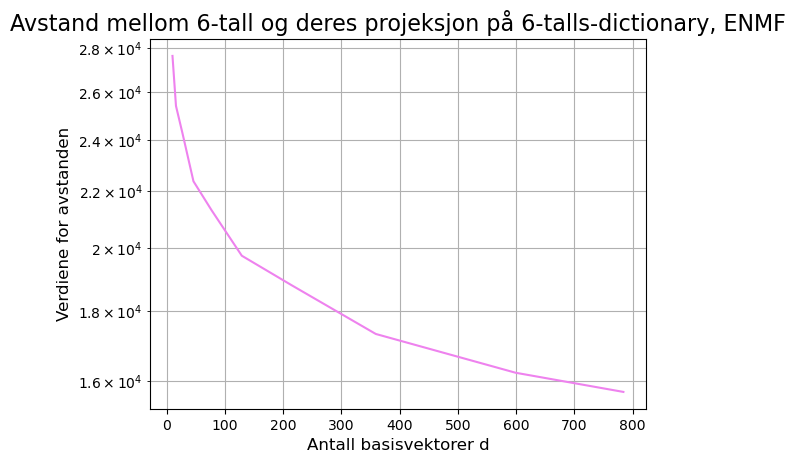

In [23]:
dGridF = np.logspace(1,3,10, dtype = np.int64)
dGridF[-1] = 784  # Endrer siste verdi manuelt til 784, ettersom dette er maks antall basisvektorer vi kan ha pga. antall piksler

dENMF = np.zeros(dGridF.size)

for i in range(len(dGridF)):
    indexSelectionF = np.random.choice(train[:,6,:].shape[1],dGridF[i],replace=False)
    WPlusF = train[:,6,:][:,indexSelectionF]

    DistENMF = nndist(WPlusF, train[:,6,:], 50, delta)
    dENMF[i] = np.sum(DistENMF)

plt.semilogy(dGridF, dENMF, c= 'violet')
plt.title("Avstand mellom 6-tall og deres projeksjon på 6-talls-dictionary, ENMF", fontsize=16)
plt.xlabel("Antall basisvektorer d", fontsize=12)
plt.ylabel("Verdiene for avstanden", fontsize=12)
plt.grid(True, which="both")
plt.show()

Man kan se i plottene at distansen mellom bildet og projeksjonen minker, for både SVD og ENMF, desto større d blir. Projeksjonen ligner altså mer og mer på det faktiske bildet ved større verdi for d. For ENMF vil dette gi mening på grunn av at sannsynligheten for at dictionarien får basisvektorer med sentral informasjon, framfor basisvektorer med lite informasjon, øker med d. Likevel er hele tiden distansen i $10^{4}$. I plottet for SVD ser vi at distansen starter med å være mellom $10^{4}$ og $10^{5}$ før den synker til et sted nærmere $10^{2}$ for $d \approx 500$ for så å synke brått mot 0. Dette fordi den sentrale informasjonen kommer i de første basisvektorene for SVD mens ved ENMF er de tilfeldig fordelt utover.

Fra plottene i 2e) kan vi se at ENMF gir en dårligere projeksjon for lave verdier av d. Dermed at for lave verdier for d er SVD egnet bedre enn ENMF. Det er derimot lettere å skille på distansen for høye verdier av d i ENMF enn i SVD. Fra $d \approx 500$ og opp er distansen tilnærmet lik 0 for SVD, noe som vil tilsi at projeksjonen ligger praktisk talt oppå bildet, mens for ENMF ser vi at distansen fortsetter å synke selv for høye verdier av d. Altså er SVD bedre for lave verdier for d, mens ENMF er bedre for høye verdier av d. 

# Oppgave 3

### Oppgave 3 a)

For å kunne klassifisere bildene er det viktig å finne den basisen som ligger nærmest bildet. Funksjonene i denne oppgaven beregner avstanden mellom den valgte klassen og alle de gitte basisene med ENMF og SVD metoder, og returnerer i tillegg hvilken basis hvert bilde ligger nærmest. Dette blir nyttige verktøy når vi skal klassifisere test-bildene i resten av oppgave 3.

In [24]:
def distToBasisSVD(B, W, digits):      # Funksjon som benytter SVD
    '''
    Input: Testdatasett i matrise B, liste med dictionaries W, og antall typer tall som testes.
    Output: Avstanden fra dataen til hver basis, og en prediksjon på hvilke tall den tror befinner seg i B
    '''
    digits = np.array(digits)          # Brukes for å predikerte tall
    size = (len(digits), B.shape[1])   # Tar inn antall dictionaries og antall bilder                 
    Distance = np.zeros(size)          # Brukes for å lagre avstand fra B til hvert dictionary                         
    for i in range(len(digits)):       # Itererer gjennom hver dictionary
        D = dist(W[i], B)              # Regner ut avstanden mellom B og det gitte dictionariet vha. SVD
        Distance[i] = D                # Her representerer radene antall dictionaries, og kolonnene antall bilder

    idx = np.argmin(Distance, axis=0)  # Finner det nærmeste dictionariet for hvert bilde
    pred = digits[idx]                 # Lagrer en verdi med tallet den tror bildet er 
    
    return Distance, pred

In [25]:
def distToBasisENMF(B, W, digits):            # Funksjon som benytter ENMF
    '''
    Input: Testdatasett i matrise B, liste med dictionaries W, og antall typer tall som testes.
    Output: Avstanden fra dataen til hver basis, og en prediksjon på hvilke tall den tror befinner seg i B
    '''
    digits = np.array(digits)               # Brukes for å predikerte tall
    size = (len(digits), B.shape[1])        # Tar inn antall dictionaries og antall bilder 
    Distance = np.zeros(size)               # Brukes for å lagre avstand fra B til hvert dictionary
    for i in range(len(digits)):            # Itererer gjennom hver dictionary
        D = nndist(W[i], B, maxIter, delta) # Regner ut avstanden mellom B og det gitte dictionariet vha. ENMF
        Distance[i] = D                     # Her representerer radene antall dictionaries, og kolonnene antall bilder
    idx = np.argmin(Distance, axis=0)       # Finner det nærmeste dictionariet for hvert bilde
    pred = digits[idx]                      # Lagrer en verdi med tallet den tror bildet er 
    
    return Distance, pred

### Oppgave 3 b)

For å kunne se tydeligere forskjell på SVD og ENMF, er det nyttig å se på treffsikkerheten for de ulike metodene. For å oppnå dette lager vi funksjoner for å finne dictionaries for metodene, slik at disse kan gjenbrukes senere.

In [26]:
#Fra utdelt kode, ikke endret
def generate_test(test, digits = [0,1,2], N = 800):
    """
    Randomly generates test set.
    input:
        test: numpy array. Should be the test data loaded from file
        digits: python list. Contains desired integers
        N: int. Amount of test data for each class
    output:
        test_sub: (784,len(digits)*N) numpy array. Contains len(digits)*N images
        test_labels: (len(digits)*N) numpy array. Contains labels corresponding to the images of test_sub
    """

    assert N <= test.shape[2] , "N needs to be smaller than or equal to the total amount of available test data for each class"

    assert len(digits)<= 10, "List of digits can only contain up to 10 digits"

    # Arrays to store test set and labels
    test_sub = np.zeros((test.shape[0], len(digits)*N))
    test_labels = np.zeros(len(digits)*N)

    # Iterate over all digit classes and store test data and labels
    for i, digit in enumerate(digits):
        test_sub[:, i*N:(i+1)*N] = test[:,digit,:]
        test_labels[i*N:(i+1)*N] = digit

    # Indexes to be shuffled 
    ids = np.arange(0,len(digits)*N)

    # Shuffle indexes
    np.random.shuffle(ids)

    # Return shuffled data 
    return test_sub[:,ids], test_labels[ids]

In [27]:
# Funksjoner for å lage dictionaries

def dictSVD(numberOfDigits, numberOfDicColumns):
    #WSVD = np.zeros((numberOfDigits,784,numberOfDicColumns))           #Oppretter en tom np.array
    WSVD = []
    for i in range(0, numberOfDigits):
        USVD, ΣSVD, vTSVD = np.linalg.svd(train[:,i,:], full_matrices = False)  #Regner ut SVD
        WSVDTemp, HSVD = truncSVD(USVD, ΣSVD, vTSVD , numberOfDicColumns)     #Trunkerer SVD med d = 32
        WSVD.append(WSVDTemp)
    return WSVD
    
def dictENMF(numberOfDigits, numberOfDicColumns, delta, maxIter):
    #WENMF = np.zeros((numberOfDigits,784,numberOfDicColumns))          #Oppretter en tom np.array
    WENMF = []
    for i in range(0, numberOfDigits):
        indexSelectionENMF = np.random.choice(train[:,i,:].shape[1],numberOfDicColumns,replace=False) #Velger ut 32 tilfeldige kolonner fra matrisen
        WENMFTemp = train[:,i,:][:,indexSelectionENMF]
        WENMF.append(WENMFTemp)
    return WENMF

In [28]:
# Lager dictionaries til bruk i oppgaven

numberOfDigits = 3
numberOfDicColumns = 32
test3Digits, labels3 = generate_test(test, [0,1,2], 800)      #Oppretter en test matrise ved bruk av generate_test

W3SVD = dictSVD(numberOfDigits, numberOfDicColumns)
W3ENMF = dictENMF(numberOfDigits, numberOfDicColumns, delta, maxIter)

In [29]:
'''Oppretter noen hjelpefunksjoner til denne oppgaven'''

def checkCorrect(correct, tested):
    '''
    Input: Array med riktige labels og array med gjettede labels
    Output: Antall riktige 
    '''
    numCorrect = 0
    for i in range(len(correct)):
        if correct[i] == tested[i]: # Hvis fasit = gjett
            numCorrect += 1
    return numCorrect

def accuracy(correct, total):
    '''
    Input: Antall riktige forutsigelser og array med riktige labels
    Output: Forholdet mellom antall riktige gjett og totale gjett
    '''
    numTotal = len(total)
    return correct*100/numTotal


def recall(correct,tested,classes):
    '''
    Input: Array med riktige labels, array med gjettede labels og klasse
    Output: Forholdet mellom antall riktige gjett for klassen og totalt antall gjett i klassen
    '''
    numCorrect = 0
    correctClass = 0
    for i in range(len(correct)):
        if correct[i] == classes:
            correctClass +=1
            if correct[i] == tested[i]:
                numCorrect += 1
    return numCorrect*100/correctClass

In [30]:
'''Gjennomfører utregninger og plotter resulatene'''
delta = 10**(-10)
maxIter = 50

svdPred3 = distToBasisSVD(test3Digits, W3SVD, [0,1,2])[1]
enmfPred3 = distToBasisENMF(test3Digits, W3ENMF, [0,1,2])[1]

correctSVD = checkCorrect(labels3, svdPred3)
correctENMF = checkCorrect(labels3, enmfPred3)

# Regner ut "accuracy" for henholdsvis SVD og ENMF
accuracySVD = accuracy(correctSVD, labels3)
accuracyENMF = accuracy(correctENMF, labels3)

# Regner ut "recall" for henholdsvis SVD og ENMF, for tre tall
recall3SVD = []
recall3ENMF = []
for i in range(numberOfDigits):
    recall3SVD.append(recall(labels3, svdPred3, i))
    recall3ENMF.append(recall(labels3, enmfPred3, i))

# Lager en tabell som undersøker hvilke tall som scorer best i SVD og ENMF
table = [['Testet på', 'Treff SVD (%)', 'Treff ENMF (%)'], [0, recall3SVD[0], recall3ENMF[0]], [1, recall3SVD[1], recall3ENMF[1]], [2, recall3SVD[2], recall3ENMF[2]]]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

# Lager en tabell som viser hvilken metode som scorer best
totalTable = [["Testmetode","Totalt treff (%)"], ["SVD", accuracySVD], ["ENMF", accuracyENMF]]
print(tabulate(totalTable, headers='firstrow', tablefmt='fancy_grid'))



╒═════════════╤═════════════════╤══════════════════╕
│   Testet på │   Treff SVD (%) │   Treff ENMF (%) │
╞═════════════╪═════════════════╪══════════════════╡
│           0 │          99.75  │           99.125 │
├─────────────┼─────────────────┼──────────────────┤
│           1 │          99.5   │           99.375 │
├─────────────┼─────────────────┼──────────────────┤
│           2 │          98.125 │           97.375 │
╘═════════════╧═════════════════╧══════════════════╛
╒══════════════╤════════════════════╕
│ Testmetode   │   Totalt treff (%) │
╞══════════════╪════════════════════╡
│ SVD          │             99.125 │
├──────────────┼────────────────────┤
│ ENMF         │             98.625 │
╘══════════════╧════════════════════╛


Vi kan se at SVD har bedre treffsikkerhet enn ENMF ved $d=32$. Dette er fordi SVD kjører bedre ved få verdier for d, fordi den er en metode som krever få verdier for å gjenskape utgangspunktet. 

I SVD ser vi videre at '0' har best teffsikkerhet, '1' nest best og '2' dårligst treffsikkerhet av tallene. Dette gir mening fordi tallet 0 og 1 har tydeligere og mer unike former, mens tallet 2 er vanskeligere å kjenne igjen på formen da den er mer sammensatt og lettere kan forveksles med andre tall. Videre kan man se at det er større forskjell i treffsikkerheten mellom 1 og 2 enn mellom 0 og 1 som kan være p.ga nettopp dette med å skille på formen. 

ENMF genererer tilfeldige basisvektorer, så det gir mening at treffsikkerheten endres og er bedre for noen verdier da det kan være at et av tallene får basisvektorer med mindre informasjon. Ved flere kjøringer har vi sett at tallet 2 gjennomgående får lavest treffsikkerhet, noe som gir mening fordi den kan ha informasjon som ligner på andre tall. Altså at selv om vi får tilfeldige basivektorer, er det mer sannsynlig at tallet 2 får basisvektorer som gir dårligere treffsikkerhet enn for 0 og 1. 

### Oppgave c)


I denne oppgaven printes det mest sannsynlig riktige bildet av nullerne ved bruk av SVD metoden. Dette er en god nuller å ta utgangspunkt i diskusjon rundt outliers i d).

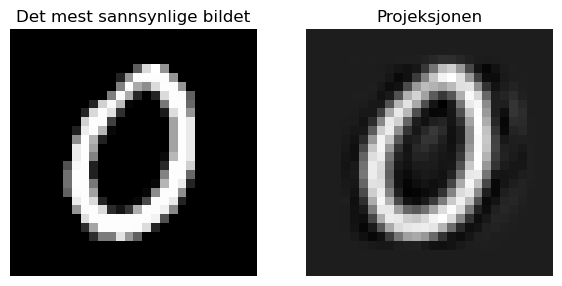

In [31]:
def mostLikely(tested,number):
    '''
    Input: Avstanden for alle bildene til alle basisene, tallet vi vil finne det beste av
    Output: Det "mest sannynlige bildet", det med minst avstand mellom bildet og basisen 
    '''
    allNumber = tested[number]
    bestPicture = np.argmin(allNumber)
    return bestPicture
    
    
mostLikely = mostLikely(distToBasisSVD(test3Digits, W3SVD,[0,1,2])[0],0)
mostLikelyProj = orthproj(W3SVD[0], test3Digits.T[mostLikely])

# plotter det mest sannsynlige bildet basert på et valgt tall, og projeksjonen
fig, ax = plt.subplots(1, 2, figsize=(7, 7))

ax[0].imshow(test3Digits.T[mostLikely].reshape((28,28)), cmap='gray')
ax[0].set_title("Det mest sannsynlige bildet")
ax[1].imshow(mostLikelyProj.reshape((28,28)), cmap='gray') 
ax[1].set_title("Projeksjonen")
ax[0].axis('off')
ax[1].axis('off')

plt.show()

I denne oppgaven printes det mest sannsynlig riktige bildet av nullerne med bagrunn av SVDbasisen til venstre og projeksjonen til høyre. Det er lite støy rundt nulleren i projeksjonen fordi bildet stemmer godt overens med basisen.

### Oppgave 3 d)

I MNIST- datasettet er det en bred variasjon av håndskrevne tall. Alle tallene vil ikke være like "pent" skrevet, noe som fører til at datamaskinen kan mistolke bildene. I denne oppgeven skal vi se på et av disse mistolkede tallene og undersøke på hva som gjør at tallet er plassert feil.

Dette er egentlig et bilde av en 0
Programmet tror det er bilde av et 2 tall


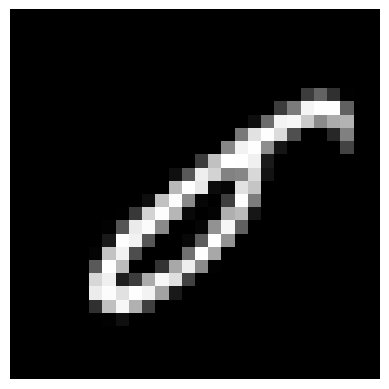

In [32]:
for i in range(len(labels3)):
    if(labels3[i] == 0):
        if(labels3[i] != svdPred3[i]):
            misclassified = i
            break

print(f'Dette er egentlig et bilde av en {"%.0f" % labels3[misclassified]}')
print(f'Programmet tror det er bilde av et {svdPred3[misclassified]} tall')
plt.imshow(test3Digits.T[misclassified].reshape((28,28)), cmap='gray')
plt.axis('off')
plt.show()

På bildet over kan det ses en avlang og sammenpresset null. Den er nokså forskjellig fra nullen i c) som er tydelig rund. Spesielt på venstre side av denne nullen virker det mer som en rett linje framfor en bue. På grunn av dette antar programmet at det et 1-tall, som sett når vi printer antagelsen. Dette er en typisk outlier av dataen da trekkene tallet har ikke sammensvarer med standarden.

### Oppgave 3 e)

I denne oppgaven skal vi gjøre det samme som i 3b), men med flere verdier, slik at vi kan se hvordan treffsikkerheten varierer for de ulike tallene. Dette er nyttig for å kunne se hvilke tall som har en tendens til å ha relativt høy eller lav treffsikkerhet. 

In [33]:
numberOfDigits = 4
numberOfDicColumns = 32
digits = [0,1,2,3]
maxIter = 50
delta = 10**(-10)
test4Digits, labels4 = generate_test(test, digits, 800)       #Oppretter en test matrise ved bruk av generate_test

W4SVD = dictSVD(numberOfDigits, numberOfDicColumns)
W4ENMF = dictENMF(numberOfDigits, numberOfDicColumns, delta, maxIter) 

svdPred4 = distToBasisSVD(test4Digits, W4SVD, digits)[1]
enmfPred4 = distToBasisENMF(test4Digits, W4ENMF, digits)[1]

correctSVD4 = checkCorrect(labels4, svdPred4)
correctENMF4 = checkCorrect(labels4, enmfPred4)

# Regner ut "accuracy" for henholdsvis SVD og ENMF
accuracySVD4 = accuracy(correctSVD4, labels4)
accuracyENMF4 = accuracy(correctENMF4, labels4)

# Regner ut "recall" for henholdsvis SVD og ENMF, for tre tall

recall4SVD = []
recall4ENMF = []
for i in range(numberOfDigits):
    recall4SVD.append(recall(labels4, svdPred4, i))
    recall4ENMF.append(recall(labels4, enmfPred4, i))

# Lager en tabell som undersøker hvilke tall som scorer best i SVD og ENMF
table = [['Testet på', 'Treff SVD (%)', 'Treff ENMF (%)'], [0, recall4SVD[0], recall4ENMF[0]], [1, recall4SVD[1], recall4ENMF[1]], [2, recall4SVD[2], recall4ENMF[2]], [3, recall4SVD[3], recall4ENMF[3]]]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

# Lager en tabell som viser hvilken metode som scorer best
totalTable = [["Testmetode","Totalt treff (%)"], ["SVD", accuracySVD4], ["ENMF", accuracyENMF4]]
print(tabulate(totalTable, headers='firstrow', tablefmt='fancy_grid'))

╒═════════════╤═════════════════╤══════════════════╕
│   Testet på │   Treff SVD (%) │   Treff ENMF (%) │
╞═════════════╪═════════════════╪══════════════════╡
│           0 │          99.75  │           99.5   │
├─────────────┼─────────────────┼──────────────────┤
│           1 │          99.25  │           99.375 │
├─────────────┼─────────────────┼──────────────────┤
│           2 │          97.125 │           95     │
├─────────────┼─────────────────┼──────────────────┤
│           3 │          97.625 │           93.75  │
╘═════════════╧═════════════════╧══════════════════╛
╒══════════════╤════════════════════╕
│ Testmetode   │   Totalt treff (%) │
╞══════════════╪════════════════════╡
│ SVD          │            98.4375 │
├──────────────┼────────────────────┤
│ ENMF         │            96.9062 │
╘══════════════╧════════════════════╛


Ser at treffsikkerheten ved SVD for 0, 1, 2 er den samme som i b), som gir mening fordi tallene blir tildelt de samme basisvektorene. Videre kan man se at det igjen er tilfeldig treffsikkerhet ved ENMF og at noen tall har mye bedre treffsikkerhet enn andre, på tross av kompleksheten av tallet. Ved SVD ser vi at tallet 3 har bedre treffsikkerhet enn 2. Dette kan være fordi det er lettere å forveksle tallet 2 enn 3, da 2 tallet har flere fellsestrekk med de andre tallene enn 3. For ENMF ser vi også at tallet 2 har en tendens til å ha lavere treffsikkerhet, til tross for tilfeldige tildelte basisvektorer, dette er med på å styrke teorien om at det er lettere å ta feil av et 2 tall enn et 3 tall. 

### Oppgave 3 f)

SVD og ENMF er to forskjellige metoder å hente ut basisvektorer på, men hvilken metode som er best for ulike verdier av d skal ses nærmere på i denne oppgaven.

In [34]:
digits = [0,1,2,3,4,5,6,7,8,9]
test10Digits, labels10 = generate_test(test, digits, 800)

# Lager et grid d for ulike antall d
d = []
for i in range(1, 10):
    d.append(2**i)
d.append(784)    # Legger til siste verdi for d manuelt, ettersom  784 er maks antall basisvektorer vi kan ha

# Skal teste det samme som i b), men for ulike d
delta = 10**(-2)
maxIter = 50
accuracySVD10 = np.zeros(len(d))
accuracyENMF10 = np.zeros(len(d))

for i in trange(0, len(d)):
          
    W10SVD = dictSVD(len(digits), d[i])
    
    W10ENMF = dictENMF(len(digits), d[i], delta, maxIter)

    # Regner ut "accuracy" for henholdsvis SVD og ENMF
    svdPred10 = distToBasisSVD(test10Digits, W10SVD, digits)[1]
    correctSVD10 = checkCorrect(labels10, svdPred10)
    accuracySVD10Temp = accuracy(correctSVD10, labels10)

    # Lagrer "accuracy" for ENMF
    enmfPred10 = distToBasisENMF(test10Digits, W10ENMF, digits)[1]
    correctNN10 = checkCorrect(labels10, enmfPred10)
    accuracyENMF10Temp = accuracy(correctNN10, labels10)

    accuracySVD10[i] = accuracySVD10Temp
    accuracyENMF10[i] = accuracyENMF10Temp

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [06:57<00:00, 41.72s/it]


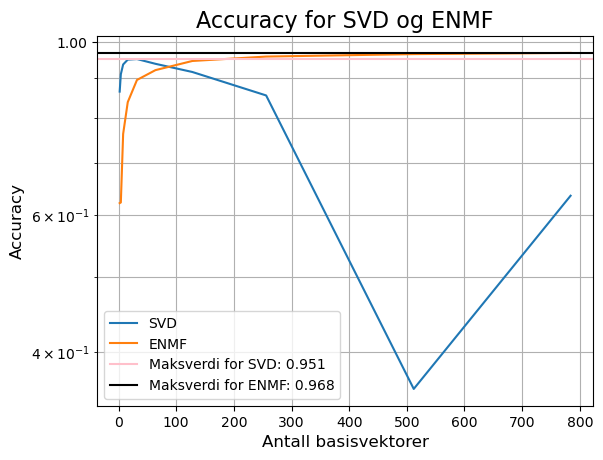

In [35]:
class ScalarFormatterClass(ScalarFormatter):
   def _set_format(self):
      self.format = "%1.2f"

plt.semilogy(d, accuracySVD10/100, label="SVD") # denne funker
plt.semilogy(d, accuracyENMF10/100, label="ENMF")

maxValueSVD10 = max(accuracySVD10/100)
maxValueENMF10 = max(accuracyENMF10/100)
plt.axhline(maxValueSVD10, c = 'pink', label=f'Maksverdi for SVD: {maxValueSVD10:.3f}')
plt.axhline(maxValueENMF10, c = 'black', label=f'Maksverdi for ENMF: {maxValueENMF10:.3f}')



ax = plt.gca()
yScalarFormatter = ScalarFormatterClass(useMathText=True)
yScalarFormatter.set_powerlimits((0,0))
ax.yaxis.set_major_formatter(yScalarFormatter)

plt.title("Accuracy for SVD og ENMF", fontsize=16)
plt.xlabel("Antall basisvektorer", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.grid(True, which="both")
plt.legend()
plt.show()

Først vil vi kommentere at grunnen til at grafen ikke går til $ d= 1024$ er fordi vi ikke har sett at det er mulig å lage en basis med 1024 kolonner. Hver kolonne representerer en pikselverdi, og ettersom det kun er 784 piksler i hvert bilde kan man ikke ha flere basisvektorer enn dette. Dette er også grunnen til at vi har laget denne verdien manuelt i koden, da vi så dette som enkleste måte å få den til å bli rett.

Vi studerer først grafen for SVD. At grafen først går litt opp, skyldes at det kreves hvertfall noen basisvektorer for å kunne representere tall godt nok, og med for få basisvektorer blir det mer "gjetting" fordi forskjellen på distansene mellom bildene og deres projeksjon ned i de ulike basisene ikke er stor. Likevel observerer vi at treffsikkerheten begynner ganske høyt for det, nærmere 85%. Dette er fordi SVD er laget for å kunne gjenskape bildet med så få verdier som mulig. Vi ser derfor at SVD opererer godt med lave verdier for d. Dette er også noe vi kan se i plottingen av projeksjonene i oppgave 2 c), hvor 6-tallet ble godt gjenskapt allerede ved $d = 16$.

Siden SVD er laget for nøyaktighet for få d, kan det oppstå problemer når d blir for stor. Hvis vi har for mange basisvektorer vil den lettere klare å representere andre tall enn det den er trent opp til fordi den blir for generell. Hvis man f.eks ser på tallet 6, vil noen basisvektorer blant annet forklare hvordan den krummer seg, men får man for mye informasjon med for mye støy, er det ikke usannsynlig at det samme programmet kan ende opp med å klassifisere f.eks. 8-tall som 6ere. Dette ser vi illustrert i grafen, hvor treffsikkerheten til SVD synker fra rundt $d = 20$. 

Fra grafen kan det ses at SVD blir bedre igjen for $d > 500$. Vi har forsøkt å forklare hvorfor dette skjer, men ettersom dette ikke er noe vi forventet at skulle skje og ikke finner en god forklaring på, har vi konkludert med at stigningen skyldes en regnefeil. Regnefeilen oppstår også kun i siste verdi, altså $d = 784$. 

Deretter ser vi på grafen til ENMF. Grafen begynner relativt lavt, ved rundt 55% treffsikkerhet, men stiger relativt raskt med økende d. Dette forteller oss at også ENMF-metoden må "gjette" litt i begynnelsen, fordi den ikke har nok basisvektorer. Den treffer ikke et like høyt punkt som SVD like raskt, og har derfor noen slike småfeil videre. Sammenligner vi dette med plottet av de 16 projeksjonene i 2 e), ser vi at det gir mening at ENMF er noe mindre treffsikker her enn SVD, fordi bildene har noe mer støy og er litt mer uklare.

I motsetning til SVD grafen holder derimot treffsikkerheten seg høy gjennom økende antall d, og blir gradvis noe bedre. Dette fordi med større d desto mer vil sannsynligheten for at dictionaryen vil få basisvektorer med sentral informasjon for gjenskapelsen av utgangsbildet. Denne grafen for treffsikkerheten er produsert med maxIter = 50, og selv med en så lav verdi for antall utregninger av $h^*$ oppnår vi gode resultat. 


### Oppgave 3 g)

#### Diskusjon

Gjennom prosjektet har vi testet ulike sider ved de to metodene SVD og ENMF. Vi har funnet flere styrker og svakheter med de to metodene, og ønsker å konkludere med hvilken metode vi synes har vært mest hensiktsmessig for arbeidet vi har utført i dette prosjektet.

En av de viktigste forskjellene mellom metodene er kjøretiden. Klassifisering av bilder gjennom maskinlæring er en prosess som er anvendbar i flere felt, og kan brukes til blant annet gjenkjenning av hjortevilt langs vei for å unngå påkjørsler (3). I slike tilfeller vil test-datasettet stadig oppdatere seg, og det er viktig at gjenkjenningsprosessen kan kjøres raskt og effektivt. Gjennom prosjektet, blant annet i oppgave 2 f), opplevde vi at utregning av avstand med SVD kjørte betydelig raskere enn den samme avstandsutregningen med ENMF. I tillegg ser vi fra grafen at avstandene aldri konvergerer mot 0 ved bruk av ENMF fordi verdien for maxIter, altså antall utregninger av $h^*$, ikke er høy nok. Skulle vi fått et bedre resultat måtte vi valgt en høyere verdi for maxIter, som igjen ville økt kjøretiden. Derfor foretrekker vi SVD når det gjelder kjøretid.

Et punkt som har blitt nevnt gjennom prosjektet er det faktum at ENMF setter bakgrunnsfargen til helt svart, altså verdi 0. SVD "sparer" derimot disse verdiene til eventuelle negative verdier som aldri kan oppstå fordi vi jobber med bilder som ikke har dem, og dermed får en lysere bakgrunn. På grunn av dette er det mulig å fastslå at en gjenskapelse av et bilde med SVD ikke vil treffe når det gjelder å gjenskape fargenyanser. Likevel vil vi argumentere for at til bruk som ligner det vi har utført i dette prosjektet, har ikke gjenskapelsen av bildet noen annen nytte enn visualisering av det som skjer. Derfor har ikke denne ENMF-fordelen mye vekt. Likevel kan det at bakgrunnen til SVD ikke blir helt svart føre til noen småfeil i avstandsutregningene, som igjen kan føre til klassifiseringsfeil. Dette er noe som igjen kan føre til at treffsikkerheten til ENMF overgår den til SVD, noe vi faktisk har opplevd ved noen kjøringer i oppgave 3 b). Likevel ender vi alltid med at SVD alt i alt har høyere treffsikkerhet enn ENMF, og konkluderer med at denne egenskapen hos ENMF ikke gjør den så gunstig at vi foretrekker den foran SVD.

En annen egenskap som skiller de to metodene er hvordan $W$ produseres. Ved første tanke trodde vi at måten $W$ dannes for SVD alltid gir de beste resultat, men opplever i 3 f) at dette ikke er tilfellet. Dersom man på forhånd kan undersøke hvilke verdier av d som gir best treffsikkerhet for lave vedrier, er SVD den klare måten å danne $W$ på. Hvis man derimot ikke kan gjøre dette på forhånd og må gjette seg frem, ser man fra grafen i 3 f) at det er enkelt å treffe en mindre gunstig verdi for d. Tryggheten med ENMF er da at dersom man øker antall basisvektorer, kan man være sikker på at man oppnår en høyere treffsikkerhet faktisk den høyere enn SVD på sitt beste 3 f). Likevel er dette noe som igjen øker kjøretiden, noe som kan være ugunstig. På dette punktet synes vi likevel at ENMF er et bedre valg enn SVD, men kun om man ikke kan observere effekten av d på forhånd. Om man kan se på det slik vi har gjort, ville vi valgt SVD over ENMF her.

Basert på disse punktene er det klart at vi i vårt tilfelle synes SVD har vært best å jobbe med. ENMF kommer med gode egenskaper som kanskje er mer anvendbare i andre situasjoner, men akkurat i et slikt tilfelle med gjenkjenning og klassifisering av tall eller lignende, er SVD den beste metoden å benytte.


Vi vil i tillegg reflektere litt rundt arbeidet med maskinlæring, nærmere bestemt "dictionary learning", og hvilke positive og negative vi har opplevd og sett med det.

For det første vil vi bemerke at arbeidet med dictionary learning har gått "overraskende" bra. Til å begynne med virket det som en uoverkommelig og vanskelig matematisk metode, men raskt etter oppstarten av prosjektet var funksjonen av dictionariene og hvordan læringsprosessen skulle foregå noe vi følte vi forsto relativt godt. Det at metoden er såpass rett frem og "enkel" å sette seg inn i, gjorde det enklere for oss å jobbe på gruppe og sette oss inn i hverandres kode. På bakgrunn av dette syntes vi dictionary learning var en fin introduksjon til maskinlæring for oss som aldri har jobbet med det tidligere.

Når det kommer til selve metoden er det blant annet positivt at det kan gjenbrukes. Som vi har nevnt tidligere er $W_+$ dictionariene som tilhører ENMF metoden gode på å visuelt gjenskape bilder dersom de benytter høy nok d. At man kan bruke dictionariene for seg selv før projeksjoner og resten av arbeidet er utført, og i tillegg forstå hvertfall delvis hvilken informasjon de inneholder kan være nyttig i andre situasjoner. 

Et annet positivt punkt med dictionariene er at de ikke behøver å trenes på nytt. Gjennom oppgavene har vi ikke vært helt konsekvente på dette, ettersom vi ønsker å ha så mye som mulig av koden på samme sted for å ha oversikt, men det er noe vi er klar over at er mulig. Blant annet i oppgave 1 ble dictionary fra tidligere deloppgaver brukt videre uten at de måtte regnes ut på nytt.

Et negativt punkt med dictionary learning er at det ikke nødvendigvis er den mest effektive metoden å utføre klassifiseringsprosessen vi har gjort i dette prosjektet på. Det krever mange steg, og mange av disse stegene er ikke direkte viktige i endelig resultat. Dette inntrykket fikk vi også personlig under begynnelsen av prosjektet, da vi forsøkte å sette oss inn i hvordan dictionary learning fungerte. Gjennom blant annet ulike YouTube-videoer om temaet fikk vi oppfatningen om at metoden egentlig er noe utdatert og treg, og ikke er i bruk i blant annet arbeidslivet lenger i stor grad. Vi ser likevel som sagt verdien av å bruke det, ettersom det er en relativt enkel introduksjon til temaet. Informasjonen om at metoden er noe treg har vi likevel hatt med oss gjennom prosjektet, og dette er noe vi selv har møtt på, da enkelte utregninger har tatt lang tid. Hadde vi istedet brukt egne funksjoner rettet mer mot selve problemet om klassifisering av tall, kunne vi kommet oss til sluttresultatet uten alle stegene underveis, og forhåpentligvis på en raskere og mer effektiv måte.

#### Konklusjon

Gjennom oppgavene i prosjektet har vi kommet fram til at SVD er en bedre metode for å gjennkjenne tall ved små verdier av d og at ENMF er bedre for store verdier for d. Dette kan man se gjennomgående i oppgavene, men spesielt i 3 b) og f). Likevel vil vi konkludere med at SVD er en bedre metode enn ENMF i dette prosjektet. Dette fordi fordelene ved kortere kjøretid ved små verdier for d og hvor treffsikker programmet er ved disse verdiene taler tyngre enn tapet av fargenyanser og forsikringen om at ENMF vil være mer nøyaktig ved store nok verdier for d. Alt i alt er SVD den beste metoden for klassifisering av håndskrevne tall mellom 0-9.

## Kilder

(1) Ludvigsen M. (19. februar 2023). "TMA4320 vår 2023 - Industriell Matematikk-Prosjekt". Hentet fra https://wiki.math.ntnu.no/_media/tma4320/2023v/tma4320_indmat_prosjekt_2023_3_.pdf

(2) A. Tidemann, A.C. Elster (18. januar 2022). "Maskinlæring". Hentet fra https://snl.no/maskinl%C3%A6ring


(3) Aasheim T., Leiros J., Seljeset A. (23. mai 2022). "Detektering og varsling av hjortevilt ved veibane ved bruk av dyp læring". Hentet fra https://hvlopen.brage.unit.no/hvlopen-xmlui/bitstream/handle/11250/3020793/Leiros_Seljeset_Aasheim.pdf?sequence=1&isAllowed=y